# Regresión Logística Tarea 5 - Luis Fernando Ruiz

In [2]:
# importar librerias necesarias
import pandas as pd # Análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings   # Mensajes de advertencia 
warnings.filterwarnings('ignore')


In [3]:
# Cargar dataset
data = pd.read_csv('Documents/Titanic-Dataset.csv')


# 1.	Realizar un análisis exploratorio de los datos

In [5]:
data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

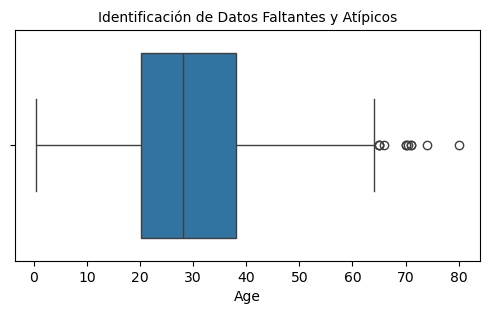

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

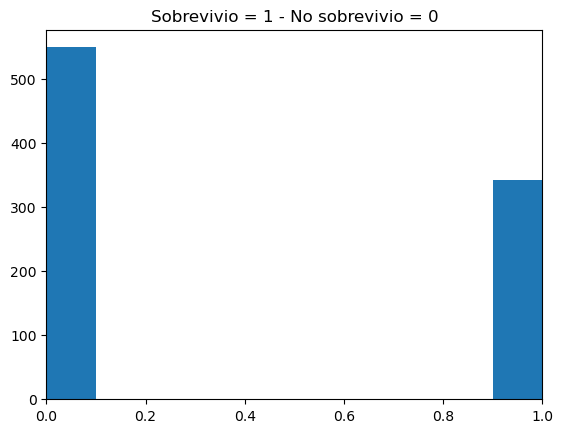

In [8]:
#Graficos de barras genero

plt.hist( data['Survived'])
plt.title('Sobrevivio = 1 - No sobrevivio = 0')
plt.xlim(0,1)
plt.show()


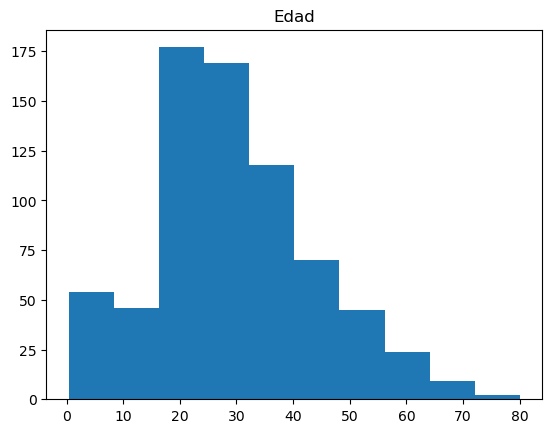

In [9]:
# Grafico histograma edad

plt.hist( data['Age'])
plt.title('Edad')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [12]:
#Revisión de datos faltantes

# Registros con valores vacios (Null).

print("Cantidad de Registros null en PassengerId: ",data['PassengerId'].isna().sum())
print("Cantidad de Registros null Survived: ",data['Survived'].isna().sum())
print("Cantidad de Registros null Pclass: ",data['Pclass'].isna().sum())
print("Cantidad de Registros null Name: ",data['Name'].isna().sum())
print("Cantidad de Registros null Sex: ",data['Sex'].isna().sum())
print("Cantidad de Registros null Age: ",data['Age'].isna().sum())
print("Cantidad de Registros null SibSp: ",data['SibSp'].isna().sum())
print("Cantidad de Registros null Parch: ",data['Parch'].isna().sum())
print("Cantidad de Registros null Ticket: ",data['Ticket'].isna().sum())
print("Cantidad de Registros null Fare: ",data['Fare'].isna().sum())
print("Cantidad de Registros null Cabin: ",data['Cabin'].isna().sum())
print("Cantidad de Registros null Embarked: ",data['Embarked'].isna().sum())


Cantidad de Registros null en PassengerId:  0
Cantidad de Registros null Survived:  0
Cantidad de Registros null Pclass:  0
Cantidad de Registros null Name:  0
Cantidad de Registros null Sex:  0
Cantidad de Registros null Age:  177
Cantidad de Registros null SibSp:  0
Cantidad de Registros null Parch:  0
Cantidad de Registros null Ticket:  0
Cantidad de Registros null Fare:  0
Cantidad de Registros null Cabin:  687
Cantidad de Registros null Embarked:  2


In [13]:
# Reemplazar valores null por la media, en la columna Age, que es una variable de las mas relevantes

data['Age'].fillna(data['Age'].mean(), inplace=True)


In [14]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros null Age: ",data['Age'].isna().sum())

Cantidad de Registros null Age:  0


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [16]:
# predecir 
# Survived NO  = 0
# Survived Si = 1


In [17]:
# Variables a eliminar del dataset, la culaes no son relevantes para el modelo

data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


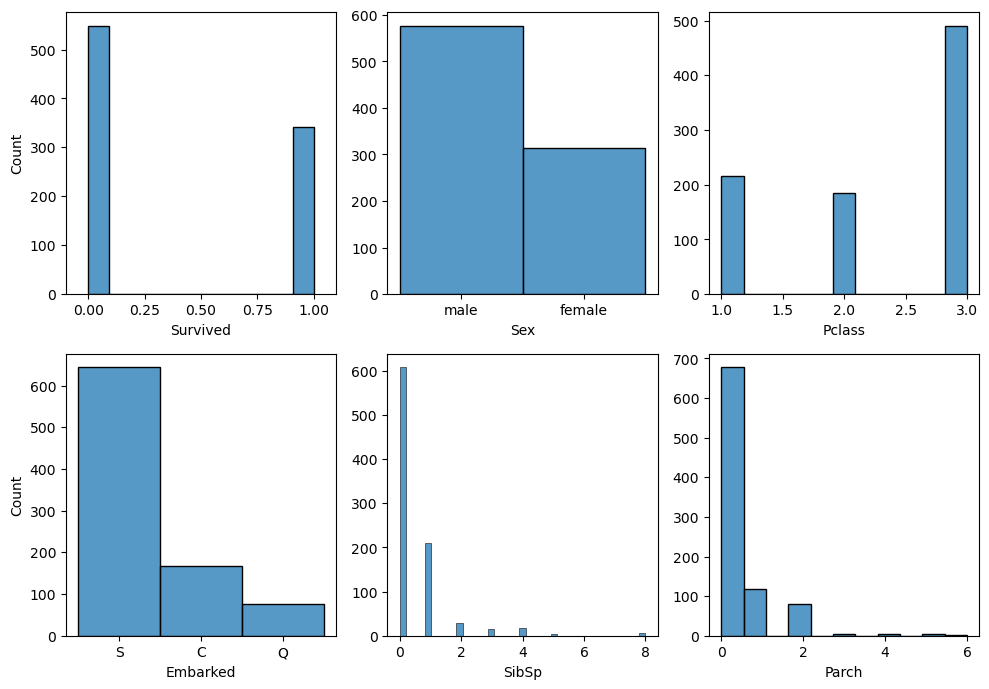

In [18]:
# Graficos de las variables seleccionadas 

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = data, x = "Parch").set(ylabel = None)
plt.tight_layout()
plt.show()

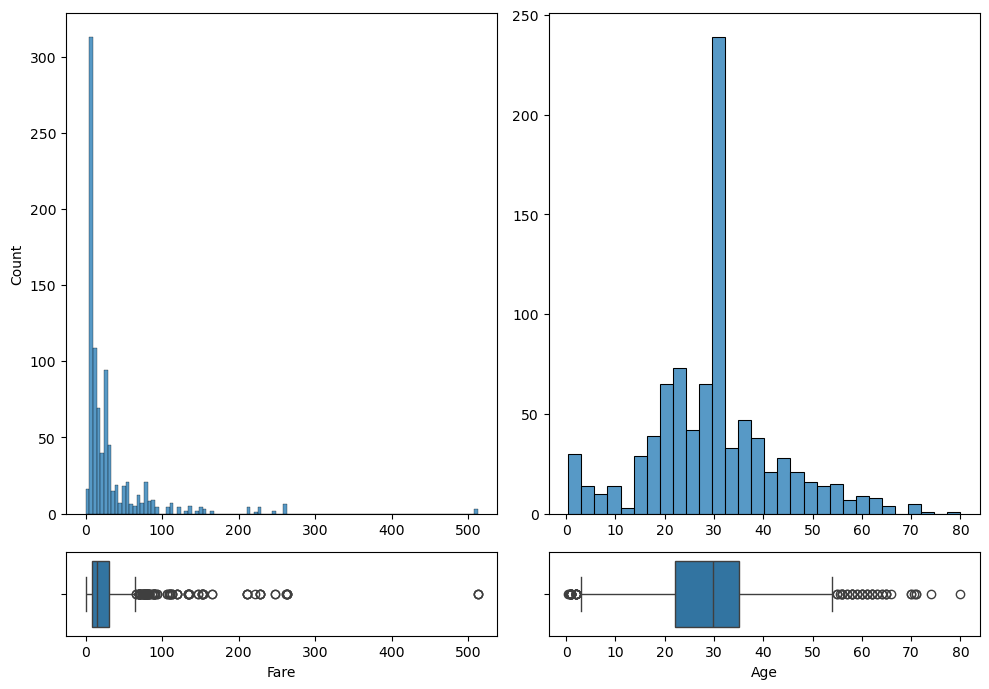

In [19]:
# Análisis sobre variables numéricas

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Age")
plt.tight_layout()
plt.show()

In [20]:
# Total de personas, 0 = no sobrevivientes, 1 = sobrevivientes

data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
data[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [23]:
data.drop(["Sex", "Embarked"], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [24]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived
Y = data['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)



In [25]:
print (X_train)

     Pclass        Age  SibSp  Parch     Fare
502       3  29.699118      0      0   7.6292
464       3  29.699118      0      0   8.0500
198       3  29.699118      0      0   7.7500
765       1  51.000000      1      0  77.9583
421       3  21.000000      0      0   7.7333
..      ...        ...    ...    ...      ...
131       3  20.000000      0      0   7.0500
490       3  29.699118      1      0  19.9667
528       3  39.000000      0      0   7.9250
48        3  29.699118      2      0  21.6792
80        3  22.000000      0      0   9.0000

[712 rows x 5 columns]


In [26]:
print (Y_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [28]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [29]:
print (Y_test)

153    0
752    0
610    0
200    0
310    1
      ..
96     0
440    1
75     0
575    0
143    0
Name: Survived, Length: 179, dtype: int64


In [30]:
print (Prediccion)

[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas de precisión, recall, F1-score, etc

In [68]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       110
           1       0.68      0.39      0.50        69

    accuracy                           0.69       179
   macro avg       0.69      0.64      0.64       179
weighted avg       0.69      0.69      0.67       179



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

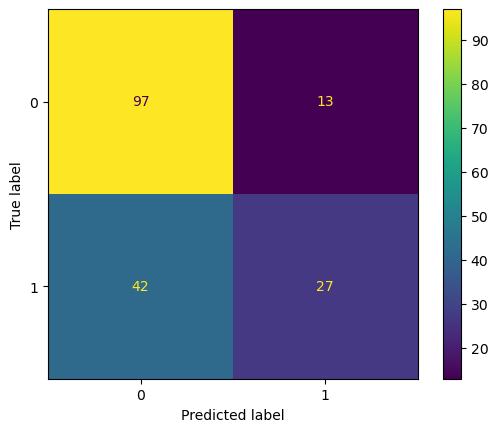

In [71]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

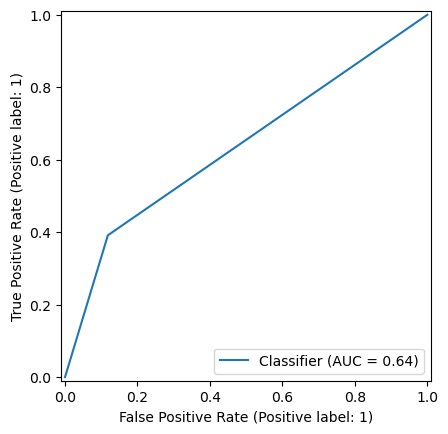

In [35]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

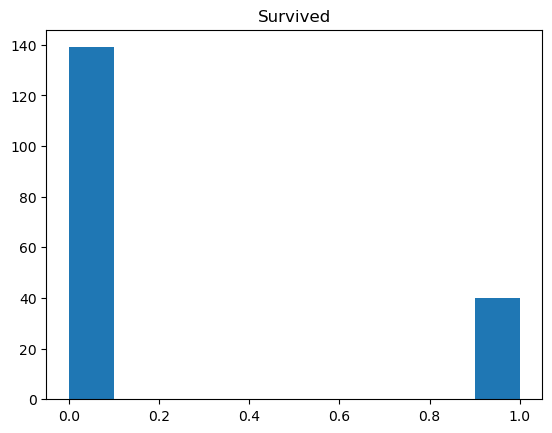

In [74]:
# Grafico histograma edad

plt.hist(Prediccion)
plt.title('Survived')
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

Modelo desarrollado se puede describir:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la variable "Survived" es 0,70 lo que significa que el 70% de los predichos como no sobrevivientes por el modelo.
Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la variable "Survived" es 0,88, lo que indica que el modelo identificó correctamente al 88% de todos los no sobrevivientes.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase variable "Survived" es 0,78, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 97

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 42

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 13

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 27

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,64 lo que significa que el 64 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación

